In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tp
from tensorflow import keras

In [90]:
D=pd.read_csv(r"C:\Users\RAHUL PATIL\Downloads\output.csv")
D

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [91]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [92]:
D.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [93]:
D.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


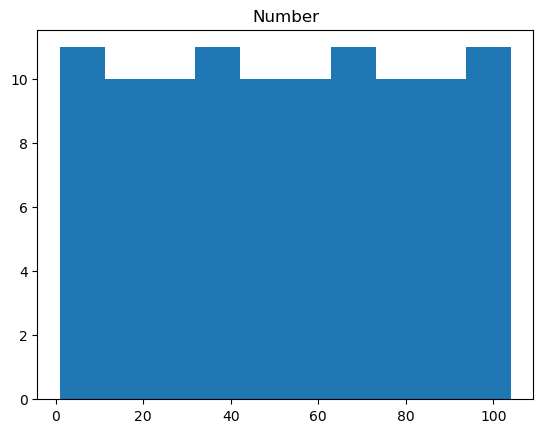

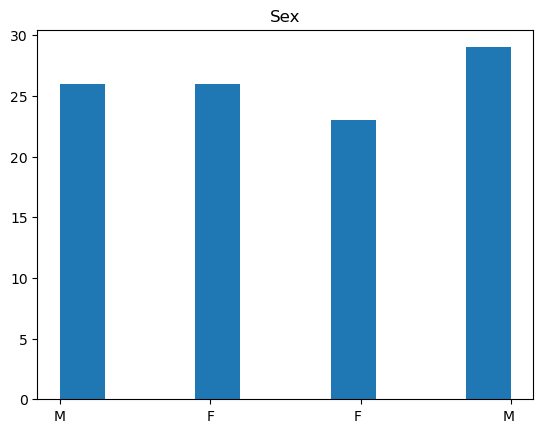

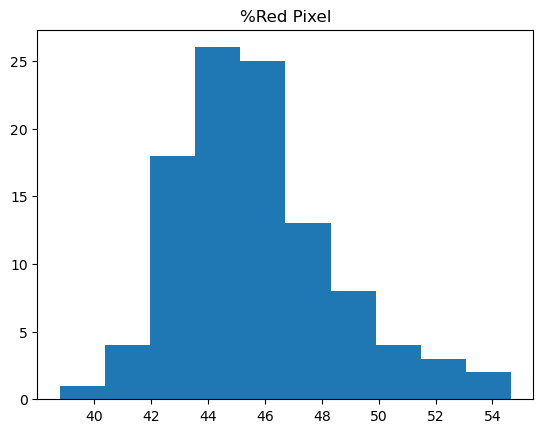

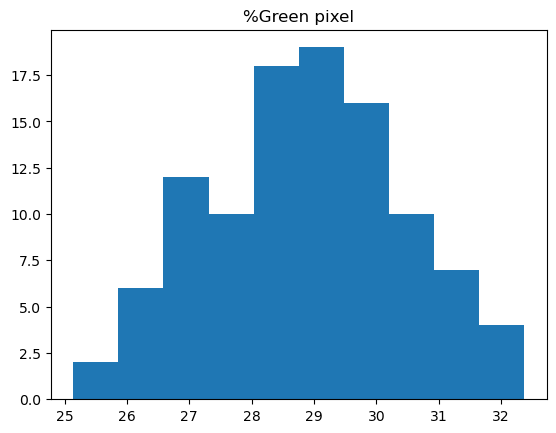

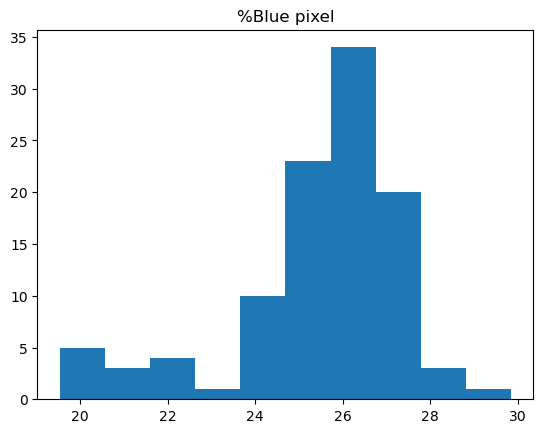

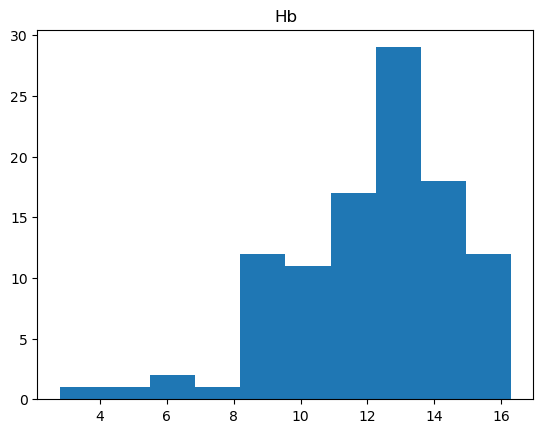

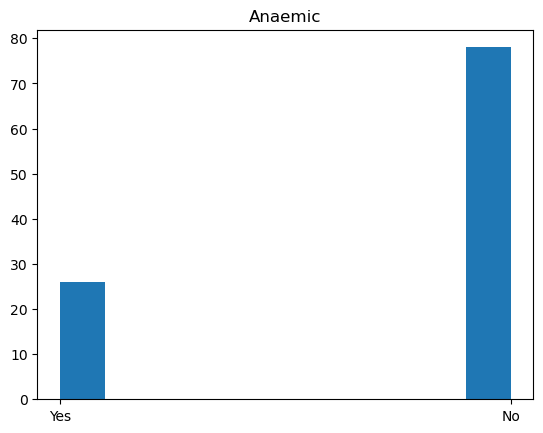

In [94]:
for i in D.columns:
    plt.hist(D[i])
    plt.title(i)
    plt.show()

<Axes: >

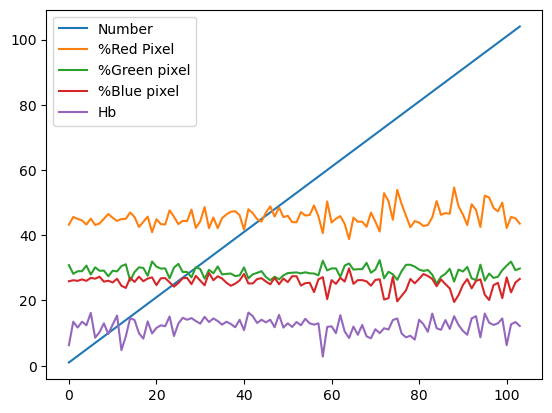

In [95]:
D.plot()

In [96]:
DD=pd.get_dummies(D,drop_first=True).replace({True:1,False:0})
DD

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Sex_F,Sex_M,Sex_M,Anaemic_Yes
0,1,43.2555,30.8421,25.9025,6.3,0,1,0,1
1,2,45.6033,28.1900,26.2067,13.5,0,0,0,0
2,3,45.0107,28.9677,26.0215,11.7,1,0,0,0
3,4,44.5398,28.9899,26.4703,13.5,0,0,0,0
4,5,43.2870,30.6972,26.0158,12.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,1,0,0,1
100,101,42.2324,30.6757,27.0919,6.3,0,0,1,1
101,102,45.6064,31.9084,22.4852,12.7,0,0,0,0
102,103,45.2095,29.2769,25.5136,13.4,0,0,1,0


In [97]:
F=DD.drop('Anaemic_Yes',axis=1)
T=DD['Anaemic_Yes']

In [98]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(F,T)

In [99]:
from sklearn.preprocessing import MinMaxScaler 
M=MinMaxScaler()

In [100]:
x_train=M.fit_transform(x_train) 
x_test=M.transform(x_test)

In [101]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(8,),activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8695 - loss: 0.3198 
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8631 - loss: 0.3144 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8410 - loss: 0.2762 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.3490 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8826 - loss: 0.3170 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8307 - loss: 0.3004 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8229 - loss: 0.3079 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8140 - loss: 0.2803 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8798 - loss: 0.3141 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8514 - loss: 0.3233 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9161 - loss: 0.2864 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9097 - loss: 0.3234 
E

In [105]:
T=model.predict(x_test)
T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[4.1722259e-01],
       [5.7589847e-01],
       [1.0755325e-01],
       [1.5514255e-01],
       [6.5826505e-01],
       [3.6119870e-03],
       [6.0454388e-03],
       [9.8045036e-02],
       [2.6351517e-01],
       [3.3687460e-04],
       [7.2164129e-04],
       [4.4817632e-04],
       [2.4127164e-01],
       [5.4854548e-01],
       [6.9270007e-02],
       [2.8877279e-01],
       [4.8441704e-02],
       [4.1042946e-04],
       [3.2036003e-01],
       [6.3597941e-01],
       [2.5409469e-02],
       [3.5786542e-01],
       [2.2276526e-02],
       [2.3101434e-01],
       [4.0615589e-04],
       [2.0535721e-01]], dtype=float32)

In [106]:
pred=[]
for i in T:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [107]:
pred

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,pred)

0.8846153846153846

In [109]:
confusion_matrix(y_test,pred)

array([[19,  0],
       [ 3,  4]], dtype=int64)

In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.57      0.73         7

    accuracy                           0.88        26
   macro avg       0.93      0.79      0.83        26
weighted avg       0.90      0.88      0.87        26



In [111]:
model.evaluate(x_train,y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9186 - loss: 0.2297  


[0.22773109376430511, 0.9230769276618958]

In [112]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8846 - loss: 0.6152


[0.6151779890060425, 0.8846153616905212]

In [113]:
x_train

array([[0.15686275, 0.35058388, 0.67198871, 0.61038215, 0.40740741,
        0.        , 0.        , 0.        ],
       [0.18627451, 0.40456515, 0.72439747, 0.49207277, 0.65185185,
        0.        , 0.        , 0.        ],
       [0.97058824, 0.22730491, 0.76584853, 0.72772106, 0.25925926,
        0.        , 0.        , 1.        ],
       [0.76470588, 0.36638989, 0.72829907, 0.54641962, 0.38518519,
        1.        , 0.        , 0.        ],
       [0.21568627, 0.5848953 , 0.22897701, 0.57676197, 0.91111111,
        1.        , 0.        , 0.        ],
       [0.01960784, 0.37996626, 0.5326102 , 0.66616492, 0.79259259,
        0.        , 0.        , 0.        ],
       [0.23529412, 0.30520361, 0.84274606, 0.55607491, 0.74814815,
        0.        , 0.        , 1.        ],
       [0.5       , 0.34182408, 0.47836133, 0.76209386, 0.78518519,
        0.        , 1.        , 0.        ],
       [0.88235294, 0.28751861, 0.71234677, 0.67589943, 0.4962963 ,
        0.        , 0.      

In [114]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(x_train,y_train)

LogisticRegression()

In [115]:
L1=L.score(x_train,y_train)*100 
L1

87.17948717948718

In [116]:
L2=L.score(x_test,y_test)*100 
L2

80.76923076923077

In [117]:
from sklearn.svm import SVC
S=SVC()
S.fit(x_train,y_train)

SVC()

In [118]:
S1=S.score(x_train,y_train)*100
S1

94.87179487179486

In [119]:
S2=S.score(x_test,y_test)*100
S2

80.76923076923077

In [120]:
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
G=GaussianNB()
C=ComplementNB()
M=MultinomialNB()
B=BernoulliNB()

In [121]:
G.fit(x_train,y_train)

GaussianNB()

In [122]:
G1=G.score(x_train,y_train)*100
G1

53.84615384615385

In [123]:
G2=G.score(x_test,y_test)*100
G2

42.30769230769231

In [124]:
B.fit(x_train,y_train)

BernoulliNB()

In [125]:
B1=B.score(x_train,y_train)*100
B1

78.2051282051282

In [126]:
B2=B.score(x_test,y_test)*100
B2

73.07692307692307

In [127]:
C.fit(x_train,y_train)

ComplementNB()

In [128]:
C1=C.score(x_train,y_train)*100
C1

75.64102564102564

In [129]:
C2=C.score(x_test,y_test)*100
C2

53.84615384615385

In [130]:
M.fit(x_train,y_train)

MultinomialNB()

In [131]:
M1=M.score(x_train,y_train)*100
M1

78.2051282051282

In [132]:
M2=M.score(x_test,y_test)*100
M2

73.07692307692307

In [133]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()

In [134]:
K.fit(x_train,y_train)

KNeighborsClassifier()

In [135]:
K1=K.score(x_train,y_train)*100
K1

89.74358974358975

In [136]:
K2=K.score(x_test,y_test)*100
K2

76.92307692307693

In [137]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()

In [138]:
D.fit(x_train,y_train)

DecisionTreeClassifier()

In [139]:
D1=D.score(x_train,y_train)*100
D1

100.0

In [140]:
D2=D.score(x_test,y_test)*100
D2

92.3076923076923

In [141]:
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier()
f.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
F1=f.score(x_train,y_train)*100
F1

100.0

In [143]:
F2=f.score(x_test,y_test)*100
F2

100.0

In [144]:
from sklearn.ensemble import AdaBoostClassifier
A=AdaBoostClassifier()

In [145]:
A.fit(x_train,y_train)

AdaBoostClassifier()

In [146]:
A1=A.score(x_train,y_train)*100
A1

100.0

In [147]:
A2=A.score(x_test,y_test)*100
A2

92.3076923076923

In [148]:
import numpy as np

In [149]:
AC={'Models':['LOGISTIC REGRESSION','SVC','GaussianNB','BernoulliNB','ComplementNB','MultinomialNB','K Nearest Neighbor','Decision Tree','AdaBoostClassifier','RandomForest'],'Train Accuracy':[L1,S1,G1,B1,C1,M1,K1,D1,A1,F1],'Test Accuracy':[L2,S2,G2,B2,C2,M2,K2,D2,A2,F2]}
AC=pd.DataFrame(AC)
AC=np.around(AC,2)
AC

,Models,Train Accuracy,Test Accuracy
0,LOGISTIC REGRESSION,87.18,80.77
1,SVC,94.87,80.77
2,GaussianNB,53.85,42.31
3,BernoulliNB,78.21,73.08
4,ComplementNB,75.64,53.85
5,MultinomialNB,78.21,73.08
6,K Nearest Neighbor,89.74,76.92
7,Decision Tree,100.00,92.31
8,AdaBoostClassifier,100.00,92.31
9,RandomForest,100.00,100.00


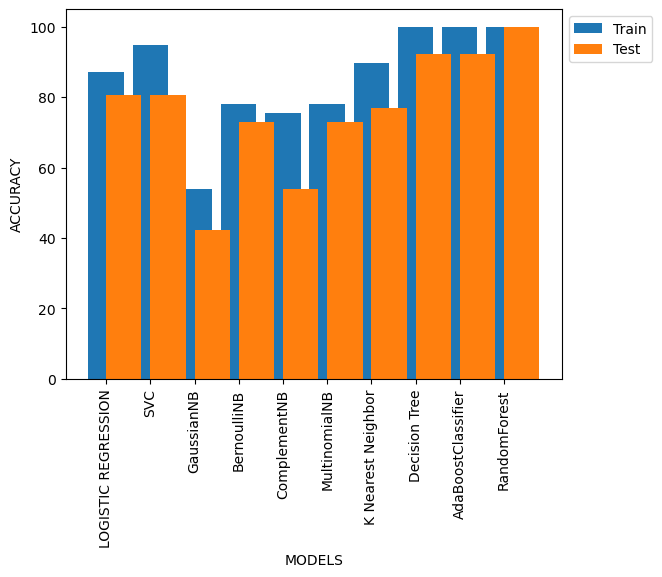

In [150]:
plt.bar(AC['Models'],AC['Train Accuracy'],label='Train')
plt.bar(AC['Models'],AC['Test Accuracy'],align='edge',label='Test')
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.xticks(rotation=90)
plt.show()
